# Projet Fraude 



In [2]:
import warnings
import pandas as pd 
import numpy as np 
import seaborn as sns
import sklearn as sklearn
warnings.simplefilter('ignore')
#autres

### Importer les dataset

In [4]:
#target --> class : 1 Fraud | 0 ok 
df_fraud = pd.read_csv('../data/Fraud_Data.csv'); df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [5]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [6]:
df_countries = pd.read_csv('../data/IpAddress_to_Country.csv'); df_countries.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [5]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Créer une nouvelle colonne `country` en effectuant une jointure entre les deux dataset 

In [6]:
len(df_fraud) == len(df_countries)

False

In [7]:
country = len(df_fraud) * [0]

for ind, row in df_fraud.iterrows():
    temp = df_countries[(df_countries['lower_bound_ip_address'] < row['ip_address']) & (df_countries['upper_bound_ip_address'] > row['ip_address'])]['country']
    if len(temp) == 1:
        country[ind] = temp.values[0]
    else:
        country[ind] = "other"

df_fraud['country'] = country
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,other
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


### Créer une nouvelle variable `time_diff` qui sera la différence entre les variables `purchase_time` et `signup_time`

In [8]:
df_fraud['signup_time'] = pd.to_datetime(df_fraud['signup_time'])
df_fraud['purchase_time'] = pd.to_datetime(df_fraud['purchase_time'])
df_fraud['time_diff'] = (df_fraud['purchase_time'] - df_fraud['signup_time'])/np.timedelta64(1, 's')
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,time_diff
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,4506682.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1.0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,other,492085.0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,4361461.0


### Regroupper les `user_id` par `device_id`  afin d'avoir le nombre de device par client  

In [9]:
device_user_count = len(df_fraud) * [0]
device_count = df_fraud.groupby('device_id')['user_id'].count()
device_user_count = device_count[df_fraud['device_id']]
device_user_count = device_user_count.reset_index().drop('device_id', axis = 1)
device_user_count.columns = ['device_user_count']
df_fraud = pd.concat([df_fraud, device_user_count], axis = 1)
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,time_diff,device_user_count
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,4506682.0,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944.0,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1.0,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,other,492085.0,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,4361461.0,1


### Faire de même pour les `ip_address` 

In [10]:
ip_count = df_fraud.groupby('ip_address')['user_id'].count()
ip_count = ip_count[df_fraud['ip_address']].reset_index().drop('ip_address', axis = 1)
ip_count.columns = ['ip_count']
df_fraud = pd.concat([df_fraud, ip_count], axis = 1)
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,time_diff,device_user_count,ip_count
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,4506682.0,1,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944.0,1,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1.0,12,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,other,492085.0,1,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,4361461.0,1,1


### Traiter les variables `signup_time` & `purchase_time` afin de les différentier suivant la semaine et le week end  

In [11]:
df_fraud["signup_day"] = df_fraud["signup_time"].dt.dayofweek
df_fraud["signup_week"] = df_fraud["signup_time"].dt.week
df_fraud["purchase_day"] = df_fraud["purchase_time"].dt.dayofweek
df_fraud["purchase_week"] = df_fraud["purchase_time"].dt.week
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,time_diff,device_user_count,ip_count,signup_day,signup_week,purchase_day,purchase_week
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,4506682.0,1,1,1,9,5,16
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944.0,1,1,6,23,0,24
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1.0,12,12,3,1,3,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,other,492085.0,1,1,1,18,0,19
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,4361461.0,1,1,1,30,2,37


### Définir vos variables de travail (X,y)

In [12]:
y = df_fraud['class']
data = df_fraud.drop(['user_id', 'signup_time','purchase_time','class',"device_id"], axis = 1)
X = data
X.isnull().sum()

purchase_value       0
source               0
browser              0
sex                  0
age                  0
ip_address           0
country              0
time_diff            0
device_user_count    0
ip_count             0
signup_day           0
signup_week          0
purchase_day         0
purchase_week        0
dtype: int64

### Afficher les informations du dataset afin de vizualiser les variables numeriques et categoriques

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   purchase_value     151112 non-null  int64  
 1   source             151112 non-null  object 
 2   browser            151112 non-null  object 
 3   sex                151112 non-null  object 
 4   age                151112 non-null  int64  
 5   ip_address         151112 non-null  float64
 6   country            151112 non-null  object 
 7   time_diff          151112 non-null  float64
 8   device_user_count  151112 non-null  int64  
 9   ip_count           151112 non-null  int64  
 10  signup_day         151112 non-null  int64  
 11  signup_week        151112 non-null  int64  
 12  purchase_day       151112 non-null  int64  
 13  purchase_week      151112 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 16.1+ MB


### Traiter les variables catégoriques

In [14]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
X['source'] = lb.fit_transform(X['source'])
X['browser'] = lb.fit_transform(X['browser'])
X['sex'] = lb.fit_transform(X['sex'])
X['country'] = lb.fit_transform(X['country'])
X.head()

,purchase_value,source,browser,sex,age,ip_address,country,time_diff,device_user_count,ip_count,signup_day,signup_week,purchase_day,purchase_week
0,34,2,0,1,39,7.327584e+08,84,4506682.0,1,1,1,9,5,16
1,16,0,0,0,53,3.503114e+08,171,17944.0,1,1,6,23,0,24
2,15,2,3,1,53,2.621474e+09,171,1.0,12,12,3,1,3,1
3,44,2,4,1,41,3.840542e+09,181,492085.0,1,1,1,18,0,19
4,39,0,4,1,45,4.155831e+08,171,4361461.0,1,1,1,30,2,37


### Spliter vos variables 

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

### Instancier un `RandomForestClassifier` et l'entrainer sur vos données 

In [16]:
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier(n_estimators= 20, criterion = 'entropy', max_depth= 50, min_samples_leaf= 3,
                                    min_samples_split= 3, oob_score= True)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=50, min_samples_leaf=3,
                       min_samples_split=3, n_estimators=20, oob_score=True)

### Afficher l'accuracy moyenne pour 10 'fold cross validation'

In [17]:
from sklearn.metrics import classification_report
preds = clf_forest.predict(X_test)
preds
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     34201
           1       0.99      0.54      0.70      3577

    accuracy                           0.96     37778
   macro avg       0.97      0.77      0.84     37778
weighted avg       0.96      0.96      0.95     37778



### Afficher les `feature_importances_`

In [18]:
importances = clf_forest.feature_importances_
importances

array([0.04977854, 0.01086374, 0.01711702, 0.00743699, 0.04524499,
       0.06264818, 0.02872433, 0.15698618, 0.17513653, 0.18371294,
       0.02478369, 0.06748932, 0.02554029, 0.14453725])

In [19]:
data.columns.values[:-1]

array(['purchase_value', 'source', 'browser', 'sex', 'age', 'ip_address',
       'country', 'time_diff', 'device_user_count', 'ip_count',
       'signup_day', 'signup_week', 'purchase_day'], dtype=object)

### Vizualiser les sur un graphique 

<AxesSubplot:>

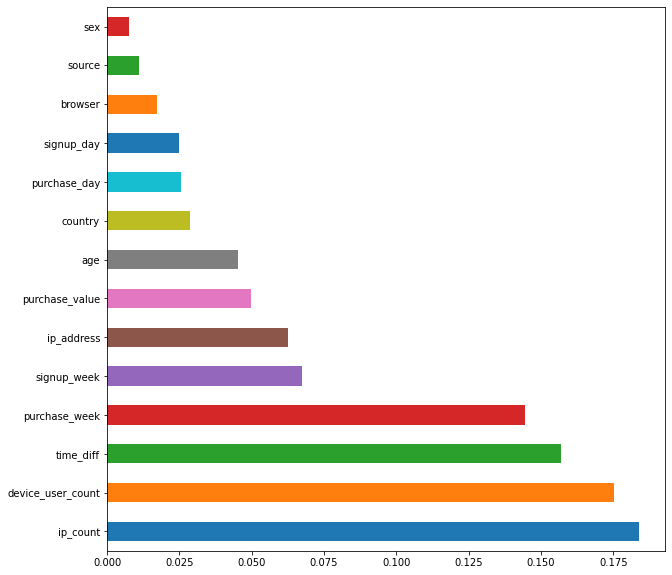

In [20]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
(pd.Series(clf_forest.feature_importances_, index=X.columns)
   .nlargest(14)
   .plot(kind="barh",color=colors,figsize=(10,10)))

### Afficher le `Classification report`

In [21]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     34201
           1       0.99      0.54      0.70      3577

    accuracy                           0.96     37778
   macro avg       0.97      0.77      0.84     37778
weighted avg       0.96      0.96      0.95     37778



### Traçer la courbe AUC 

In [39]:
from sklearn import metrics
from pandas import DataFrame
import matplotlib.pyplot as plt 
prob_score = clf_forest.predict_proba(X_test)
prob_score = DataFrame(prob_score).iloc[:,0]
fpr,tpr,thresholds = metrics.roc_curve(y_test,1-prob_score)

In [42]:
test_fpr, test_tpr, _ = metrics.roc_curve(y_test.values, y_pred)
test_auc = np.round(metrics.auc(test_fpr, test_tpr), 3)

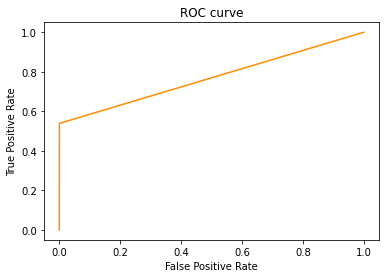

In [43]:
plt.plot(test_fpr,test_tpr, color = 'darkorange')
plt.xlim([-.05, 1.05])
plt.ylim([-.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

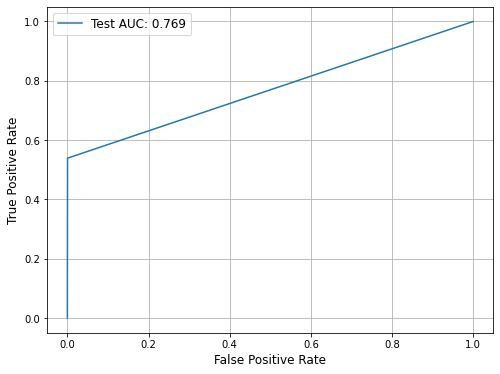

In [44]:
test_fpr = np.insert(test_fpr, 0, 0)
test_tpr = np.insert(test_tpr, 0, 0)

fig, ax = plt.subplots(figsize=(8, 6))
#ax.plot(train_fpr, train_tpr, label='Train AUC: ' + str(train_auc))
ax.plot(test_fpr, test_tpr, label='Test AUC: ' + str(test_auc))
#ax.plot(test_fpr, test_tpr, 'k--', label='Chance Curve')
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.grid(True)
ax.legend(fontsize=12)
plt.show()

### Afficher la matrice de confusion 
Qu'en pensez vous ? 

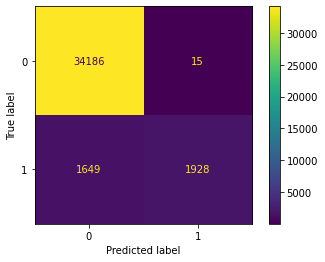

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = clf_forest.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

On remarque que l'algo a une chance sur deux de detecter une fraud.

### Faire une selection de certaine variables et spliter vos varibales 

### Entrainer un classifieur `LogisticRegression` sur ces variables 

In [34]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X, y)
clf.predict(X_test)
clf.predict_proba(X_test)
clf.score(X, y)

0.9063542273280746